In [1]:
import numpy as np
import string

In [37]:
X_train = np.load("X_train.npy",allow_pickle=True)
Y_train = np.load("Y_train.npy",allow_pickle=True)

In [11]:
X_train[0]

['_', '_', '_', '_', '_', '_', '_', '_', '_']

In [6]:
all_characters = ['_','&'] + list(string.ascii_lowercase)
char_to_int = {char: idx for idx, char in enumerate(all_characters)}


In [7]:
int_to_char = {idx: char for char, idx in char_to_int.items()}

In [12]:
X_int =[[char_to_int[char] for char in word] for word in X_train]
# np.shape(X_int)

In [14]:
X_padded = [array+[1]*(30-len(array)) for array in X_int]

In [15]:
X_train = np.array(X_padded)

In [16]:
Y_mod = [array/np.sum(array) for array in Y_train]
Y_mod[2]

array([0.28571429, 0.        , 0.        , 0.        , 0.        ,
       0.14285714, 0.        , 0.        , 0.14285714, 0.        ,
       0.        , 0.        , 0.14285714, 0.        , 0.        ,
       0.        , 0.        , 0.14285714, 0.        , 0.        ,
       0.        , 0.        , 0.14285714, 0.        , 0.        ,
       0.        ])

In [38]:
# Y_train = np.array(Y_mod)
Y_train = np.array(Y_train)

In [40]:
Y_train.shape

(447219, 26)

In [23]:
Y_train.shape

(447219, 26)

In [22]:
X_train.shape

(447219, 30)

In [41]:

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Lambda, Conv1D
from tensorflow.keras import backend as K

def root_mean_squared_error(y_true, y_pred):
    return tf.sqrt(tf.reduce_mean(tf.square(y_pred - y_true)))
# Model architecture
model = Sequential()

model.add(Embedding(input_dim=28, output_dim=32, input_length=30))
# model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
# model.add(LSTM(192))
model.add(tf.keras.layers.Flatten())
model.add(Dense(64, activation='tanh',input_shape = (None,30,32)))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(64, activation='tanh'))
model.add(tf.keras.layers.Dropout(0.2))
model.add(Dense(26, activation='softmax'))

# Compile the model
optimizer = tf.keras.optimizers.Adam(learning_rate=0.001,beta_1=0.8,beta_2=0.6)
model.compile(optimizer=optimizer, loss='mean_absolute_error', metrics=['accuracy'])

In [42]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_5 (Embedding)     (None, 30, 32)            896       
                                                                 
 flatten_1 (Flatten)         (None, 960)               0         
                                                                 
 dense_12 (Dense)            (None, 64)                61504     
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_13 (Dense)            (None, 64)                4160      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_14 (Dense)            (None, 26)               

In [43]:
history = model.fit(X_train,Y_train,epochs = 20,verbose=1,validation_split=0.1, batch_size=32)

Epoch 1/20
12579/12579 [==============================] - 17s 1ms/step - loss: 0.2076 - accuracy: 0.2279 - val_loss: 0.2102 - val_accuracy: 0.2340
Epoch 2/20
12579/12579 [==============================] - 15s 1ms/step - loss: 0.2075 - accuracy: 0.2284 - val_loss: 0.2100 - val_accuracy: 0.2330
Epoch 3/20
12579/12579 [==============================] - 15s 1ms/step - loss: 0.2072 - accuracy: 0.2301 - val_loss: 0.2099 - val_accuracy: 0.2381
Epoch 4/20
12579/12579 [==============================] - 14s 1ms/step - loss: 0.2071 - accuracy: 0.2308 - val_loss: 0.2098 - val_accuracy: 0.2389
Epoch 5/20
12579/12579 [==============================] - 14s 1ms/step - loss: 0.2070 - accuracy: 0.2310 - val_loss: 0.2100 - val_accuracy: 0.2380
Epoch 6/20
12579/12579 [==============================] - 14s 1ms/step - loss: 0.2069 - accuracy: 0.2323 - val_loss: 0.2097 - val_accuracy: 0.2376
Epoch 7/20
12579/12579 [==============================] - 14s 1ms/step - loss: 0.2068 - accuracy: 0.2324 - val_loss: 0

In [33]:
!pip install matplotlib

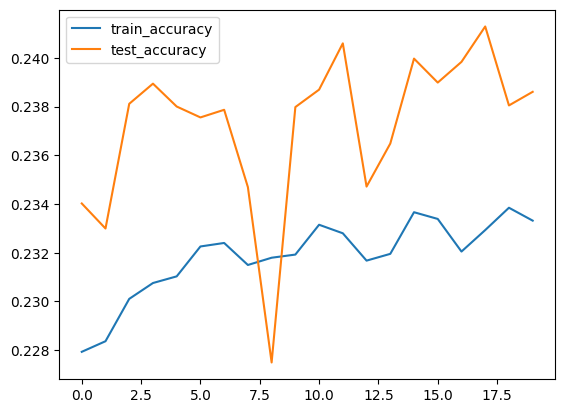

In [44]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'],label = 'train_accuracy')
plt.plot(history.history['val_accuracy'],label = 'test_accuracy')
plt.legend()

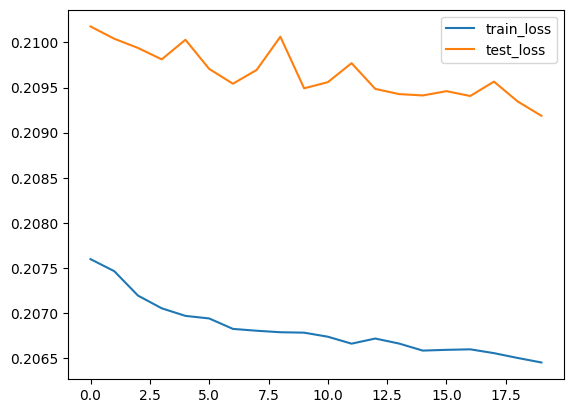

In [45]:
plt.plot(history.history['loss'],label = 'train_loss')
plt.plot(history.history['val_loss'],label = 'test_loss')
plt.legend()